In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
%matplotlib inline

In [2]:
df = pd.read_csv('Data/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
nans = df.loc[df.isna().any(axis=1)]
nulls = df.loc[df.isnull().any(axis=1)]
nulls.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


In [5]:
nans.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


In [6]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [7]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

### Since the category names collide, I'm adding a C Cholestrol level categories

In [8]:
df['Cholesterol'] = df['Cholesterol'].replace({'HIGH' :'HIGHC', 'NORMAL' :'NORMALC' }) 
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGHC,25.355,DrugY
1,47,M,LOW,HIGHC,13.093,drugC
2,47,M,LOW,HIGHC,10.114,drugC
3,28,F,NORMAL,HIGHC,7.798,drugX
4,61,F,LOW,HIGHC,18.043,DrugY


In [9]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

### Note: Low BP does not seem to be life threatening provided that it doesn't cause any oxygen deprivation. Dizziness and feeling weak is a fairly common symptom of low BP. 

#### Source: https://www.mayoclinic.org/diseases-conditions/low-blood-pressure/symptoms-causes/syc-20355465
 

### High BP is a more severe situation for us and often requires medications as treatment. If left untreated, it can cause stroke, heart attack and many other health problems. 

#### More info : https://my.clevelandclinic.org/health/diseases/4314-hypertension-high-blood-pressure

## Some charts to see distribution of each feature. (Without splitting the data for training and testing because the dataset is very small)

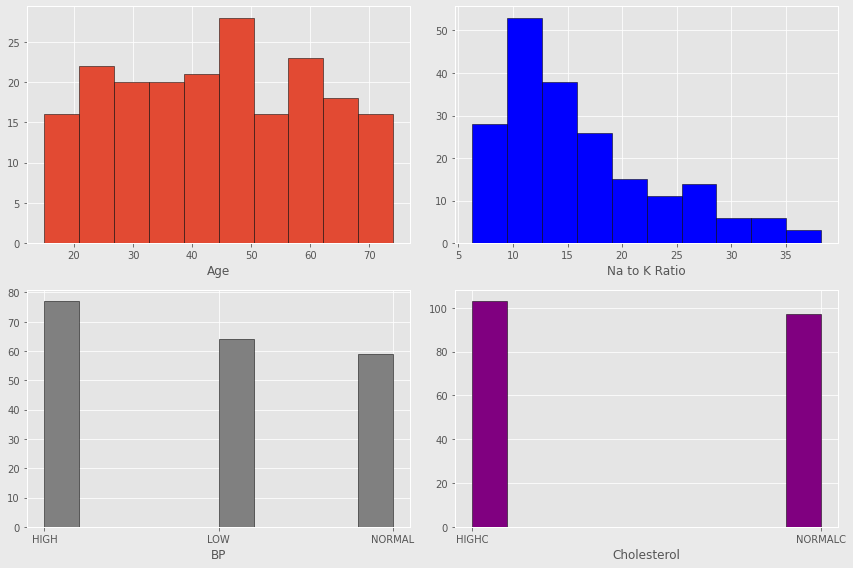

In [10]:
plt.style.use('ggplot')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=[12,8], facecolor='#EAEAEA')

ax[0,0].hist(df['Age'], edgecolor='k')
ax[0,0].set_xlabel('Age')

ax[0,1].hist(df['Na_to_K'], edgecolor='k', facecolor='blue')
ax[0,1].set_xlabel('Na to K Ratio')

ax[1,0].hist(df['BP'], edgecolor='k', facecolor='grey')
ax[1,0].set_xlabel('BP')

ax[1,1].hist(df['Cholesterol'], edgecolor='k', facecolor='purple')
ax[1,1].set_xlabel('Cholesterol')

# plt.grid(axis='y', color='#3475D0', lw = 0.5, alpha=0.7)
# ax[1,1].spines['bottom'].set_visible(False)
plt.tight_layout()
plt.show()

### Encoding categorical features

In [11]:
from sklearn.utils import shuffle
shuffled_df = shuffle(df, random_state=42)

In [12]:
train_df = shuffled_df.iloc[:175, :]
test_df = shuffled_df.iloc[175:, :]

In [13]:
train_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
95,36,M,LOW,NORMALC,11.424,drugX
15,16,F,HIGH,NORMALC,15.516,DrugY
30,18,F,NORMAL,NORMALC,8.750,drugX
158,59,F,LOW,HIGHC,10.444,drugC
128,47,M,LOW,NORMALC,33.542,DrugY


In [14]:
dm1 = pd.get_dummies(train_df['Sex'], drop_first=False)
dm2 = pd.get_dummies(train_df['BP'], drop_first=False)
dm3 = pd.get_dummies(train_df['Cholesterol'], drop_first=False)

In [15]:
train_df = pd.concat([train_df, dm1, dm2, dm3], axis=1)
train_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,F,M,HIGH,LOW,NORMAL,HIGHC,NORMALC
95,36,M,LOW,NORMALC,11.424,drugX,0,1,0,1,0,0,1
15,16,F,HIGH,NORMALC,15.516,DrugY,1,0,1,0,0,0,1
30,18,F,NORMAL,NORMALC,8.750,drugX,1,0,0,0,1,0,1
158,59,F,LOW,HIGHC,10.444,drugC,1,0,0,1,0,1,0
128,47,M,LOW,NORMALC,33.542,DrugY,0,1,0,1,0,0,1


#### Splitting X and y and model training

In [16]:
train_df = train_df.drop(['Cholesterol', 'Sex', 'BP'], axis=1)

In [17]:
X_train = train_df.drop('Drug', axis=1)
y_train = train_df['Drug']

In [18]:
X_train_num = X_train[['Age', 'Na_to_K']]
X_train_num.head()

,Age,Na_to_K
95,36,11.424
15,16,15.516
30,18,8.750
158,59,10.444
128,47,33.542


In [19]:
from sklearn.preprocessing import StandardScaler

cols = X_train_num.columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=cols)
X_train_scaled.head()

,Age,Na_to_K
0,-0.494035,-0.643365
1,-1.740700,-0.079514
2,-1.616034,-1.011825
3,0.939629,-0.778403
4,0.191630,2.404352


In [20]:
X_train = X_train.drop(['Age', 'Na_to_K'], axis=1).reset_index()
X_train_scaled = pd.concat([X_train_scaled, X_train], axis=1)
X_train_scaled

,Age,Na_to_K,index,F,M,HIGH,LOW,NORMAL,HIGHC,NORMALC
0,-0.494035,-0.643365,95,0,1,0,1,0,0,1
1,-1.740700,-0.079514,15,1,0,1,0,0,0,1
2,-1.616034,-1.011825,30,1,0,0,0,1,0,1
3,0.939629,-0.778403,158,1,0,0,1,0,1,0
4,0.191630,2.404352,128,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
170,-1.304367,2.148607,48,0,1,0,0,1,1,0
171,-0.431702,0.964272,88,1,0,1,0,0,0,1
172,1.188962,1.353676,21,0,1,0,0,1,1,0
173,-0.244702,1.616724,57,0,1,1,0,0,1,0


In [21]:
from sklearn.svm import SVC

svc_clf = SVC(kernel='rbf')
svc_clf.fit(X_train_scaled, y_train)

SVC()

In [22]:
svc_clf.score(X_train_scaled, y_train)

0.44571428571428573

## SVM probably needs more data to be more accurate

In [23]:
from sklearn.model_selection import cross_val_score

cross_val_score(svc_clf, X_train_scaled, y_train, cv=5, scoring='accuracy')

array([0.42857143, 0.42857143, 0.45714286, 0.45714286, 0.45714286])

### Going to try RandomForest now

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score
def scores(x, y):
    precision = precision_score(x, y, average='micro')
    recall = recall_score(x, y, average='micro')
    f1 = f1_score(x, y, average='micro')
    
    print('Precision : ' + str(precision))
    print('recall : ' + str(recall))
    print('f1 : ' + str(f1))

In [25]:
from sklearn.ensemble import RandomForestClassifier

rfc_clf = RandomForestClassifier(random_state=42)
rfc_clf.fit(X_train_scaled, y_train)
rfc_pred = rfc_clf.predict(X_train_scaled)
scores(y_train, rfc_pred)

Precision : 1.0
recall : 1.0
f1 : 1.0


In [26]:
cross_val_score(rfc_clf, X_train_scaled, y_train, cv=5, scoring='accuracy')

array([1.        , 1.        , 1.        , 1.        , 0.97142857])

### Might be overfitting but let's see what happens with test data. No need of grid search here, I think.

In [ ]:
## One big function to transform test data

def pipeliney(data):
    
    if 'Drug' in data.columns:
        y = data['Drug']
        data = data.drop('Drug', axis=1)
    else:
        y = None
        
    features = list(data.columns)
        
#     from sklearn.impute import SimpleImputer
    
#     data['Cholesterol'] = data['Cholesterol'].map({'HIGH': 1, 'NORMAL': 0})
    data['Cholesterol'] = data['Cholesterol'].replace({'HIGH' :'HIGHC', 'NORMAL' :'NORMALC' }) 
    
    numeric_df = data.select_dtypes(include=np.number)
#     imputer = SimpleImputer(strategy='median')
#     imputed_df = imputer.fit_transform(numeric_df)
    
    dm11 = pd.get_dummies(data['Sex'], drop_first=False)
    dm22 = pd.get_dummies(data['BP'], drop_first=False)
    dm33 = pd.get_dummies(data['Cholesterol'], drop_first=False)
    cat_df = pd.concat([data, dm11, dm22, dm33], axis=1)
    
    features = features + cat_df.columns
    features = features + onehot.categories_[0].tolist()
    
    from sklearn.preprocessing import StandardScaler
    
    scaler = StandardScaler()
    scaled_df = scaler.fit_transform(numeric_df)
    
    transformed_df = np.hstack([scaled_df, encoded_df])
    
    return transformed_df, y, features

In [32]:
test = test_df.copy()
test.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
192,72,M,LOW,HIGHC,16.310,DrugY
129,32,F,NORMAL,HIGHC,7.477,drugX
37,39,M,LOW,NORMALC,13.938,drugX
157,53,M,LOW,HIGHC,22.963,DrugY
193,72,M,LOW,HIGHC,6.769,drugC
